#Sreejith N ML132_Classification

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Data Visualization

importing dataset

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/MLCOMP/Classification/Train_data_classification.csv")
test=pd.read_csv("/content/drive/MyDrive/MLCOMP/Classification/Test_data_classification.csv")

In [ ]:
train

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio,class
0,0.117948,-0.220579,0.367214,0.914608,0.261718,1.353010,1.352689,-0.386503,-0.185368,0.541155,A
1,0.809204,-0.094960,0.118265,0.987502,0.976743,-0.515608,-0.950086,0.800147,1.155435,0.244286,I
2,0.080916,0.014957,0.064919,0.346104,0.172340,0.107265,0.446679,0.319927,0.313536,-0.028184,A
3,-3.461768,-0.204876,-3.210528,-3.441837,-3.045274,-1.636779,-8.953175,3.273029,-3.895963,-5.460407,F
4,0.056229,-0.730905,0.441898,0.183695,0.261718,1.685209,0.522180,-0.591821,-0.154186,1.319049,A
...,...,...,...,...,...,...,...,...,...,...,...
8339,-0.277055,-0.251983,-3.203415,1.957926,0.261718,1.186911,0.408929,2.198386,2.277968,0.952766,X
8340,0.019197,-0.173471,0.306755,-0.081535,0.172340,-0.723232,0.257927,0.515808,0.188810,-0.677208,F
8341,-0.128929,0.572391,-0.031104,0.319399,0.261718,-0.183409,0.446679,0.214617,0.251173,-0.298954,G
8342,1.377020,-0.063555,0.349432,0.405720,0.172340,-0.183409,0.597681,-1.538710,-0.871360,-0.349743,A


In [ ]:
test.head(5)

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio,class
0,0.130292,-0.314793,0.417003,1.051058,0.082961,0.439463,0.220177,0.699827,0.375899,0.400605,NaN
1,-0.104241,-0.314793,0.665951,-0.064110,0.172340,-1.512204,0.106925,0.119870,-0.123005,-1.312598,NaN
2,0.019197,-0.040001,0.288973,-0.042597,0.261718,-0.141884,0.371178,-1.180477,-0.777816,-0.209421,NaN
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-2.093552,-3.026359,-3.734962,-2.991700,-3.113659,NaN
4,0.031541,-0.346197,-0.009765,1.029902,0.082961,-0.432558,-3.101860,-0.692703,-0.840179,-1.852354,NaN


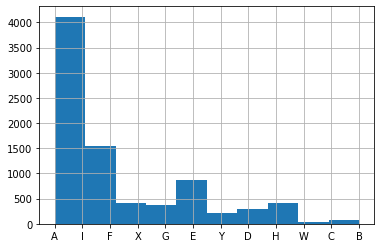

In [ ]:
train["class"].hist()

We can see that there is a huge class imbalance.Almost half of the data is from class A

In [ ]:
train.groupby('class').count()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio
class,,,,,,,,,,
A,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456
B,3,3,3,3,3,3,3,3,3,3
C,76,76,76,76,76,76,76,76,76,76
D,290,290,290,290,290,290,290,290,290,290
E,875,875,875,875,875,875,875,875,875,875
F,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544
G,365,365,365,365,365,365,365,365,365,365
H,404,404,404,404,404,404,404,404,404,404
I,658,658,658,658,658,658,658,658,658,658


The presence of class B seems to affect other classes performance, so I am removing it

In [ ]:
model_data=train.drop(index=train.loc[train["class"]=='B'].index)

In [ ]:
features=test.columns.to_list()
del features[-1]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


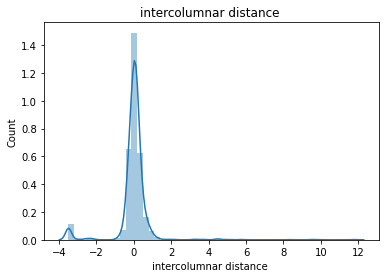

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


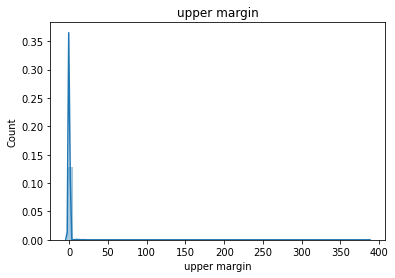

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


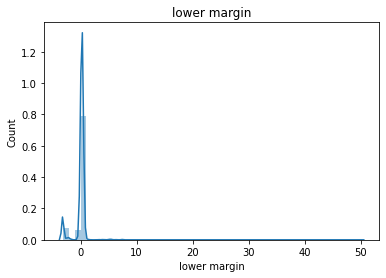

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


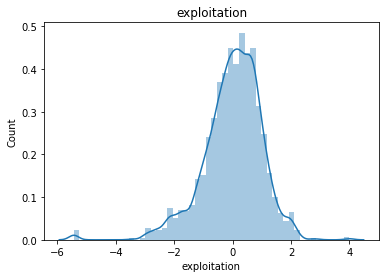

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


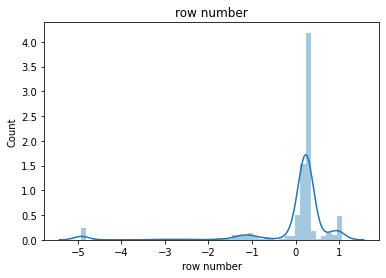

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


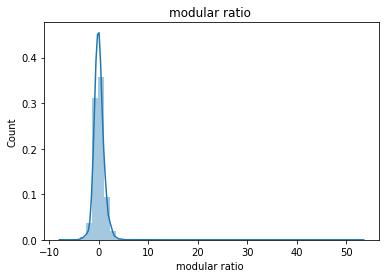

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


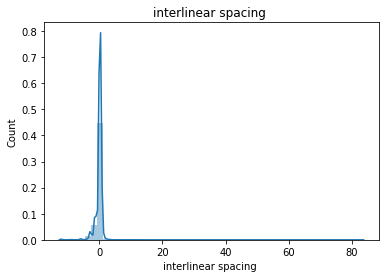

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


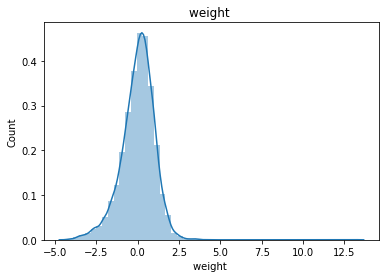

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


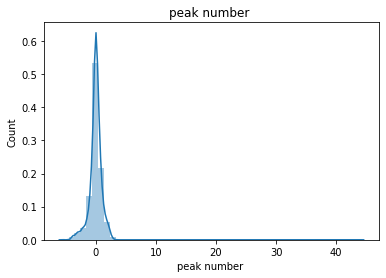

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


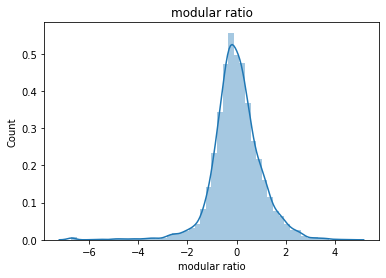

In [ ]:
for feature in features:
  sns.distplot(train[feature])
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.title(feature)
  plt.show()

##Model

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

Splitting into independent variables X and dependent variable class y

In [ ]:
X = model_data.iloc[:, 0:10].values
y = model_data.iloc[:, 10].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y)

###Balanced Random Forest Model

In [ ]:
clf = BalancedRandomForestClassifier(random_state=0,sampling_strategy="all",replacement="True",n_estimators=128,max_samples=0.5)
clf.fit(x_train,y_train)

BalancedRandomForestClassifier(max_samples=0.5, n_estimators=128,
                               random_state=0, replacement='True',
                               sampling_strategy='all')

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.87      0.49      0.62       346
           C       0.33      1.00      0.50         8
           D       0.55      0.97      0.70        29
           E       0.76      0.73      0.74        88
           F       0.63      0.64      0.63       155
           G       0.33      0.92      0.49        36
           H       0.57      0.95      0.71        40
           I       0.89      0.98      0.94        66
           W       0.21      1.00      0.35         4
           X       0.82      0.88      0.85        42
           Y       0.85      0.81      0.83        21

    accuracy                           0.67       835
   macro avg       0.62      0.85      0.67       835
weighted avg       0.75      0.67      0.68       835



###Xgboost(This model was used for submission)

In [ ]:
from imblearn.combine import SMOTEENN 

Using SMOTEENN

In [ ]:
sme = SMOTEENN(random_state=42,sampling_strategy="all")

In [ ]:
X_res, y_res = sme.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1,stratify=y_res)

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=128,)
xgb_clf.fit(x_train,y_train)

XGBClassifier(max_depth=7, n_estimators=128, objective='multi:softprob')

In [ ]:
y_pred=xgb_clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.93      0.96       153
           C       0.99      0.99      0.99       344
           D       0.99      1.00      1.00       341
           E       0.99      0.99      0.99       319
           F       0.98      0.98      0.98       267
           G       0.99      1.00      1.00       342
           H       0.99      0.99      0.99       339
           I       1.00      1.00      1.00       344
           W       1.00      1.00      1.00       346
           X       0.99      0.99      0.99       342
           Y       0.99      0.99      0.99       345

    accuracy                           0.99      3482
   macro avg       0.99      0.99      0.99      3482
weighted avg       0.99      0.99      0.99      3482



Using SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek 

In [ ]:
smtk = SMOTETomek(random_state=42,sampling_strategy="all")

In [ ]:
X_res, y_res = smtk.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1,stratify=y_res)

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=128,)
xgb_clf.fit(x_train,y_train)

XGBClassifier(max_depth=7, n_estimators=128, objective='multi:softprob')

In [ ]:
y_pred=xgb_clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.98      0.98      0.98       340
           C       0.99      1.00      1.00       346
           D       0.99      1.00      0.99       345
           E       0.99      0.97      0.98       345
           F       0.98      0.98      0.98       341
           G       1.00      1.00      1.00       345
           H       0.99      1.00      0.99       345
           I       1.00      1.00      1.00       346
           W       1.00      1.00      1.00       346
           X       0.99      0.99      0.99       346
           Y       1.00      0.99      1.00       346

    accuracy                           0.99      3791
   macro avg       0.99      0.99      0.99      3791
weighted avg       0.99      0.99      0.99      3791



##Test

In [ ]:
test_feat=test.iloc[:,0:10].values

In [ ]:
test_predict=xgb_clf.predict(test_feat)

In [ ]:
test['class']=test_predict

In [ ]:
test

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio,class
0,0.130292,-0.314793,0.417003,1.051058,0.082961,0.439463,0.220177,0.699827,0.375899,0.400605,A
1,-0.104241,-0.314793,0.665951,-0.064110,0.172340,-1.512204,0.106925,0.119870,-0.123005,-1.312598,C
2,0.019197,-0.040001,0.288973,-0.042597,0.261718,-0.141884,0.371178,-1.180477,-0.777816,-0.209421,F
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-2.093552,-3.026359,-3.734962,-2.991700,-3.113659,E
4,0.031541,-0.346197,-0.009765,1.029902,0.082961,-0.432558,-3.101860,-0.692703,-0.840179,-1.852354,A
...,...,...,...,...,...,...,...,...,...,...,...
2081,-3.498799,0.007106,0.342319,-0.318002,-4.922215,-0.972381,-0.157328,0.070031,0.594169,-0.689649,E
2082,-0.091897,-0.118513,0.189393,1.280303,0.261718,3.014004,0.408929,-1.249285,-1.027268,2.580920,A
2083,-0.091897,0.258344,0.445454,1.643582,0.082961,0.148790,0.484429,1.350108,-0.091823,0.004015,W
2084,0.327793,0.501730,0.050694,-1.018301,0.261718,-0.930856,0.031425,0.544485,0.032902,-0.740413,G


In [ ]:
submission=test.to_csv("submit_class.csv",index=False)